# MATH50003 Numerical Analysis (2022–23)
# Lab 3: Divided differences and dual numbers

This lab explores different discretisations for first and higher derivatives.
In particular we consider the following approximations:
*Forward differences*:
$$
f'(x) ≈ {f(x+h) - f(x) \over h}
$$
*Central differences*:
$$
f'(x) ≈ {f(x+h) - f(x-h) \over 2h}
$$
*Second order differences*:
$$
f''(x) ≈ {f(x+h) - 2f(x) + f(x-h) \over h^2}
$$
We also add to the implementation of `Dual` to enable
automatic differentiation with cos, sin, and division

In [6]:
using Plots, Test
# helper function to avoid trying to take logs of 0 in plots
# use in plots below
# Here COND ? EXPR1 : EXPR2
# is another way to write
# if COND
#     EXPR1
# else
#     EXPR2
# end
nanabs = x -> iszero(x) ? NaN : abs(x)

#19 (generic function with 1 method)

--------

**Problem 1** Implement central differences
for $f(x) = 1 + x + x^2$ and $g(x) = 1 + x/3 + x^2$, approximating the derivative at $x = 0$.
Plot the absolute errors for `h = 2.0 .^ (0:-1:-60)` and `h = 10.0 .^ (0:-1:-16)`.

Hint: the easiest way to do this is the copy the code from lectures/notes for forward differences,
and replace the line `f.(h) .- f(0) ./ h` with the equivalent for central differences.
Note that `f.(h)` is broadcast notation so creates a vector containing `[f(h[1]),…,f(h[end])]`.
Thus that expression creates a vector containing `[(f(h[1])-f(0))/h[1], …, (f(h[end])-f(0))/h[end]]`.

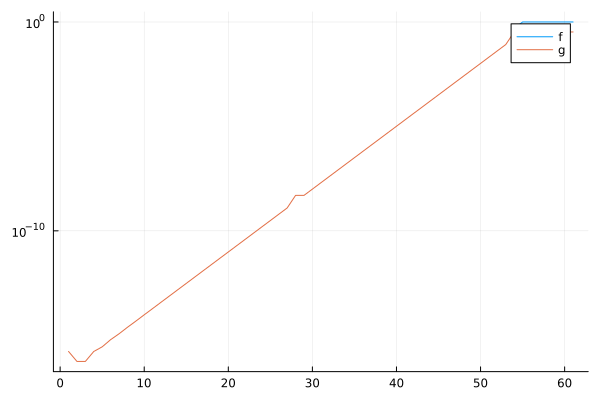

In [4]:
# SOLUTION

# define the functions
f = x -> 1 + x + x^2
g = x -> 1 + x/3 + x^2

# define analytic first derivatives for comparison
fp  = x -> 1 + 2 *x
gp = x ->1/3 + 2 *x

# central difference derivative approximation
centraldiff(x, h, f) = (f(x + h) - f(x - h))/(2 *h)

# computes an error
centraldifferror(x, h, f, fp) = abs(centraldiff(x, h, f) - fp(x))


# plotting f and g errors
x = 0.0 # some arbitrary point

# We find the error for the derivative of f is 0
# (until we run into the errors for too small h we discussed in the lecture)
h = 2.0 .^ (0:-1:-60)
plot(nanabs.(centraldifferror.(x, h, f, fp)), yaxis=:log10, label="f")
plot!(nanabs.(centraldifferror.(x, h, g, gp)), yaxis=:log10, label="g")

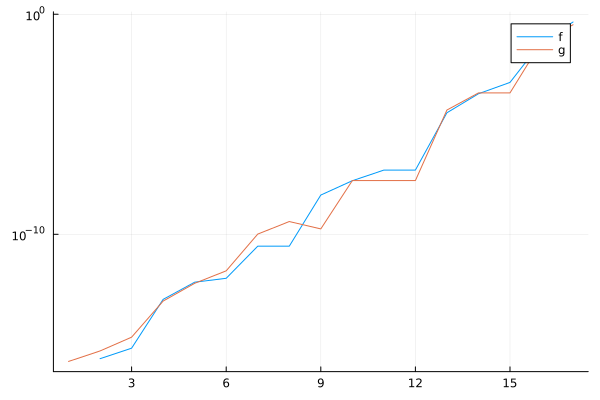

In [5]:
h = 10.0 .^ (0:-1:-16)
plot(nanabs.(centraldifferror.(x, h, f, fp)), yaxis=:log10, label="f")
plot!(nanabs.(centraldifferror.(x, h, g, gp)), yaxis=:log10, label="g")

# END

-----
**Problem 2** Use forward differences, central differences, and second-order divided differences to approximate to 5-digits the first and second
derivatives to the following functions
at the point $x = 0.1$:
$$
\exp(\exp x \cos x + \sin x), ∏_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x)
$$
where $f^{\rm s}_n(x)$ corresponds to $n$-terms of the following continued fraction:
$$
1 + {x-1 \over 2 + {x-1 \over 2 + {x-1 \over 2 + ⋱}}},
$$
e.g.:
$$f^{\rm s}_1(x) = 1 + {x-1 \over 2}$$
$$f^{\rm s}_2(x) = 1 + {x-1 \over 2 + {x -1 \over 2}}$$
$$f^{\rm s}_3(x) = 1 + {x-1 \over 2 + {x -1 \over 2 + {x-1 \over 2}}}$$

In [4]:
# SOLUTION

# Forward Difference
forwarddiff(x, h, f) = (f(x + h) - f(x))/h

# We already implemented central differences in a previous problem

# Second derivative via divided difference
divideddiffsecond(x, h, f) = (f(x + h) - 2 * f(x) + f(x - h))/ (h^2)

# Define the functions
f = x -> exp(exp(x)cos(x) + sin(x))
g = x -> prod([x] ./ (1:1000) .- 1)
function cont(n, x)
    ret = 2*one(x)
    for k = 1:n-1
        ret = 2 + (x-1)/ret
    end
    1 + (x-1)/ret
end

# Choose our point
x = 0.1;

# We have to be a bit careful with the choice of h.
## Here we use quasi-optimal h: sqrt(ϵ) for forward/central and cbrt(ϵ) for second
# derivatives, though this could have also been chosen by experiments.
ϵ_m = eps()
# Values for exp(exp(x)cos(x) + sin(x))
println("f'($x) with forward difference: ", forwarddiff(x, sqrt(ϵ_m), f))
println("f'($x) with central difference: ", centraldiff(x, cbrt(ϵ_m), f))
println("f''($x) via divided difference:  ",
divideddiffsecond(x, cbrt(ϵ_m), f))

f'(0.1) with forward difference: 6.584772557020187
f'(0.1) with central difference: 6.5847725545726465
f''(0.1) via divided difference:  12.002673711904597


In [5]:
# Values for prod([x] ./ (1:1000) .- 1)
println("f'($x) with forward difference: ", forwarddiff(x, sqrt(ϵ_m), g))
println("f'($x) with central difference: ", centraldiff(x, cbrt(ϵ_m), g))
println("f''($x) via divided difference:  ",
divideddiffsecond(x, cbrt(ϵ_m), g))

f'(0.1) with forward difference: -3.5938263945281506
f'(0.1) with central difference: -3.5938265143048937
f''(0.1) via divided difference:  26.638555736977985


In [6]:
# Values for the continued fraction
println("f'($x) with forward difference: ", forwarddiff(x, sqrt(ϵ_m), x->cont(1000,x)))
println("f'($x) with central difference: ", centraldiff(x, sqrt(ϵ_m), x->cont(1000,x)))
println("f''($x) via divided difference:  ",
divideddiffsecond(x, cbrt(ϵ_m), x->cont(1000,x)))

# END

f'(0.1) with forward difference: 1.5811387598514557
f'(0.1) with central difference: 1.5811388231813908
f''(0.1) via divided difference:  -7.905698560322122


----

We now extend our implementation of `Dual` which we began in lectures/notes as follows:

In [7]:
# Dual(a,b) represents a + b*ϵ
struct Dual{T}
    a::T
    b::T
end

# Dual(a) represents a + 0*ϵ
Dual(a::Real) = Dual(a, zero(a)) # for real numbers we use a + 0ϵ

# Allow for a + b*ϵ syntax
const ϵ = Dual(0, 1)

# import the functions which we wish to overload
import Base: +, *, -, /, ^, zero, exp, cos, sin, one

# support polynomials like 1 + x, x - 1, 2x or x*2 by reducing to Dual
+(x::Real, y::Dual) = Dual(x) + y
+(x::Dual, y::Real) = x + Dual(y)
-(x::Real, y::Dual) = Dual(x) - y
-(x::Dual, y::Real) = x - Dual(y)
*(x::Real, y::Dual) = Dual(x) * y
*(x::Dual, y::Real) = x * Dual(y)

# support x/2 (but not yet division of duals)
/(x::Dual, k::Real) = Dual(x.a/k, x.b/k)

# a simple recursive function to support x^2, x^3, etc.
function ^(x::Dual, k::Integer)
    if k < 0
        error("Not implemented")
    elseif k == 1
        x
    else
        x^(k-1) * x
    end
end

# support identity of type Dual
one(x::Dual) = Dual(one(eltype(x.a)))

# Algebraic operations for duals
-(x::Dual) = Dual(-x.a, -x.b)
+(x::Dual, y::Dual) = Dual(x.a + y.a, x.b + y.b)
-(x::Dual, y::Dual) = Dual(x.a - y.a, x.b - y.b)
*(x::Dual, y::Dual) = Dual(x.a*y.a, x.a*y.b + x.b*y.a)

exp(x::Dual) = Dual(exp(x.a), exp(x.a) * x.b)

exp (generic function with 16 methods)

**Problem 3.1** Add support for `cos`, `sin`, and `/` to the type `Dual`

In [8]:
# by replacing the `# TODO`s in the below code.

function cos(x::Dual)
    # TODO: implement cos for Duals
# SOLUTION
    Dual(cos(x.a), -sin(x.a) * x.b)
# END
end

function sin(x::Dual)
    # TODO: implement sin for Duals
# SOLUTION
    Dual(sin(x.a), cos(x.a) * x.b)
# END
end

function /(x::Dual, y::Dual)
    # TODO: implement division for Duals
# SOLUTION
    if iszero(y.a)
        error("Division for dual numbers is ill-defined when denonimator real part is zero.")
    end
    return Dual(x.a / y.a, (y.a * x.b - x.a * y.b) / y.a^2)
# END
end

x = 0.1
@test cos(sin(x+ϵ)/(x+ϵ)).b ≈ -((cos(x)/x - sin(x)/x^2)sin(sin(x)/x))

Test Passed

**Problem 3.2** Use dual numbers to compute the derivatives to
$$
\exp(\exp x \cos x + \sin x), ∏_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x).
$$
Does your answer match (to 5 digits) Problem 2?

In [9]:
# SOLUTION

# With the previous problems solved, this is as simple as running

fdual = f(0.1+ϵ)
fdual.b

6.5847725546108276

In [10]:
gdual = g(0.1+ϵ)
gdual.b

-3.593826513101571

In [11]:
contdual = cont(1000,0.1+ϵ)
contdual.b
# END

1.5811388300841893

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*